# **Import Library dan Resource yang akan digunakan**

In [488]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Inisiasi Variabel untuk menyimpan dataframe**

In [489]:
df=pd.read_csv('https://raw.githubusercontent.com/sagitasantia/Checkpoint1/main/nyc-language-data.csv')

In [490]:
df.head()

,Language,Endonym,World Region,Country,Global Speakers,Language Family,Location,Size,Status
0,Abaza,Абаза,Western Asia,"Turkey,\nRussia","49,800",Abkhaz-Adyge,Wayne (NJ),Smallest,Residential
1,Abruzzese,NaN,Southern Europe,Italy,NaN,Indo-European,Astoria,Small,Residential
2,Abruzzese,NaN,Southern Europe,Italy,NaN,Indo-European,Little Italy,Small,Historical
3,Acehnese,Bahsa Acèh,Southeastern Asia,Indonesia,"3,500,000",Austronesian,Astoria,Smallest,Community
4,Acehnese,Bahsa Acèh,Southeastern Asia,Indonesia,"3,500,000",Austronesian,Elmhurst,Smallest,Residential


# **Data Cleaning**

## **Penanganan Missing Values**

### **Pengecekkan Missing Values**

Pengecekan missing values digunakan untuk mendeteksi dan menangani rekaman yang kosong atau tak terisi dalam dataset. Langkah ini penting dalam proses analisis data karena data yang tidak lengkap dapat menyebabkan bias atau hasil yang tidak akurat dalam model atau analisis yang dibuat. Dengan mendeteksi dan menangani nilai yang hilang secara tepat.

In [491]:
print((df.isna().sum() / len(df)) * 100)

Language            0.000000
Endonym            12.913386
World Region        0.000000
Country             0.000000
Global Speakers    13.464567
Language Family     0.551181
Location            0.000000
Size                0.000000
Status              0.000000
dtype: float64


Pengecekkan didalam column endonym yg berisi missing values


In [492]:
df[df['Endonym'].isnull()]

,Language,Endonym,World Region,Country,Global Speakers,Language Family,Location,Size,Status
1,Abruzzese,NaN,Southern Europe,Italy,NaN,Indo-European,Astoria,Small,Residential
2,Abruzzese,NaN,Southern Europe,Italy,NaN,Indo-European,Little Italy,Small,Historical
5,Adjoukrou,NaN,Western Africa,Ivory Coast,"140,000",Atlantic-Congo,Concourse,Smallest,Residential
6,Adyghe,NaN,Western Asia,"Turkey,\nRussia","117,500",Abkhaz-Adyge,Wayne (NJ),Small,Residential
34,Amuzgo,NaN,Central America,Mexico,"45,900",Otomanguean,Corona,Smallest,Residential
...,...,...,...,...,...,...,...,...,...
1234,Western Yiddish,NaN,Western Europe,"Germany,\nFrance",NaN,Indo-European,Washington Heights,Smallest,Historical
1243,Yemeni Arabic,NaN,Western Asia,Yemen,"26,453,300",Afro-Asiatic,Cobble Hill,Small,Residential
1244,Yemeni Arabic,NaN,Western Asia,Yemen,"26,453,300",Afro-Asiatic,Bay Ridge,Large,Residential
1245,Yemeni Arabic,NaN,Western Asia,Yemen,"26,453,300",Afro-Asiatic,Van Nest,Medium,Residential


pengecekkan missing values di Global Speakers

In [493]:
df[df['Global Speakers'].isnull()]

,Language,Endonym,World Region,Country,Global Speakers,Language Family,Location,Size,Status
1,Abruzzese,NaN,Southern Europe,Italy,NaN,Indo-European,Astoria,Small,Residential
2,Abruzzese,NaN,Southern Europe,Italy,NaN,Indo-European,Little Italy,Small,Historical
36,Ancient Greek,NaN,Southern Europe,Greece,NaN,Indo-European,SoHo,Smallest,Reviving
38,Ao,Ao,Southern Asia,India,NaN,Sino-Tibetan,Edison (NJ),Smallest,Residential
40,Apulo-Lucano,Materano,Southern Europe,Italy,NaN,Indo-European,Chinatown,Small,Historical
...,...,...,...,...,...,...,...,...,...
1192,Unkechaug,Unkechaug,Northern America,United States,NaN,Algic,Poospatuck Reservation - Mastic (NY),Medium,Reviving
1200,Uruguayan Spanish,Español Uruguayo,South America,Uruguay,NaN,Indo-European,Jackson Heights,Small,Residential
1234,Western Yiddish,NaN,Western Europe,"Germany,\nFrance",NaN,Indo-European,Washington Heights,Smallest,Historical
1268,Zuwara,ⵎⴰⵣⵉⵗ,Northern Africa,Libya,NaN,Afro-Asiatic,Astoria,Smallest,Residential


Pengecekkan missing values di column Language Family

In [494]:
df[df['Language Family'].isnull()]

,Language,Endonym,World Region,Country,Global Speakers,Language Family,Location,Size,Status
26,American Sign Language,American Sign Language,Northern America,United States,"271,700",NaN,Jackson Heights,Large,Residential
27,American Sign Language,American Sign Language,Northern America,United States,"271,700",NaN,Tompkinsville,Large,Residential
28,American Sign Language,American Sign Language,Northern America,United States,"271,700",NaN,Midwood,Large,Residential
29,American Sign Language,American Sign Language,Northern America,United States,"271,700",NaN,Upper East Side,Large,Residential
30,American Sign Language,American Sign Language,Northern America,United States,"271,700",NaN,Pelham Bay,Large,Residential
307,Esperanto,Esperanto,Western Europe,"France,\nBrazil","2,001,000",NaN,Murray Hill,Small,Community
914,Puerto Rican Sign Language,Puerto Rican Sign Language,Caribbean,United States,NaN,NaN,Upper East Side,Smallest,Community


mengubah jenis data type pada kolom 'Global Speakers' yang sebelumnya berupa string menjadi float dengan menggunakan metode replace() untuk mengganti setiap koma (,) dalam nilai-nilai string di dalam kolom tersebut dengan string kosong (''). Tindakan ini dilakukan agar koma-koma tersebut dapat dihapus sehingga string bisa diubah menjadi angka float.

In [495]:
df['Global Speakers'] = df['Global Speakers'].str.replace(',', '')

# Konversi ke float
df['Global Speakers'] = df['Global Speakers'].astype(float)

# Menampilkan DataFrame setelah perubahan
print(df)

              Language        Endonym       World Region  \
0                Abaza          Абаза       Western Asia   
1            Abruzzese            NaN    Southern Europe   
2            Abruzzese            NaN    Southern Europe   
3             Acehnese     Bahsa Acèh  Southeastern Asia   
4             Acehnese     Bahsa Acèh  Southeastern Asia   
...                ...            ...                ...   
1265              Zaza          Dımli       Western Asia   
1266  Zoroastrian Dari            NaN      Southern Asia   
1267              Zulu        IsiZulu    Southern Africa   
1268            Zuwara          ⵎⴰⵣⵉⵗ    Northern Africa   
1269   Ü-Tsang Tibetan  དབུས་གཙང་སྐད་       Eastern Asia   

                     Country  Global Speakers Language Family  \
0            Turkey,\nRussia          49800.0    Abkhaz-Adyge   
1                      Italy              NaN   Indo-European   
2                      Italy              NaN   Indo-European   
3                  

### **Hapus Missing Values**

Keputusan untuk menghapus kolom endonim diambil karena kolom tersebut tidak digunakan dan jumlah nilai yang hilang (missing values) di dalamnya melebihi 10%.

In [496]:
df = df.drop('Endonym', axis=1)

menghapus kolom "Language family" dari tabel karena kolom tersebut tidak digunakan dalam analisis kami dan tidak memiliki pengaruh yang signifikan terhadap hasil akhir.

In [497]:
df = df.drop('Language Family', axis=1)

Untuk kolom Global Speakers, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom Global Speakers

### **Imputasi Missing Values**

In [498]:
df['Global Speakers'].dropna().describe()

count    1.099000e+03
mean     3.113691e+07
std      1.071820e+08
min      5.000000e+01
25%      3.534000e+05
50%      2.700000e+06
75%      1.708000e+07
max      1.116597e+09
Name: Global Speakers, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom Global Speakers untuk imputasi nilai kosong tersebut

In [499]:
df['Global Speakers'] = df['Global Speakers'].fillna(df['Global Speakers'].dropna().mean())

### **Pengecekkan Ulang**

pengecekkan ulang duplikasi pada setiap kolom

In [500]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Language,0.0
World Region,0.0
Country,0.0
Global Speakers,0.0
Location,0.0
Size,0.0
Status,0.0


# **Pengecekkan nilai duplikat**

## **Pengecekkan Nilai Duplikat**

In [501]:
df[df.duplicated()]

,Language,World Region,Country,Global Speakers,Location,Size,Status


### **Hapus Nilai Duplikat**

In [502]:
df = df.drop_duplicates()

## **Penanganan Outliers**

### **pengecekkan outliers**

In [526]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Global Speakers,7.322835
Size,0.000000
Status,21.889764
Global Speakers Category,0.000000


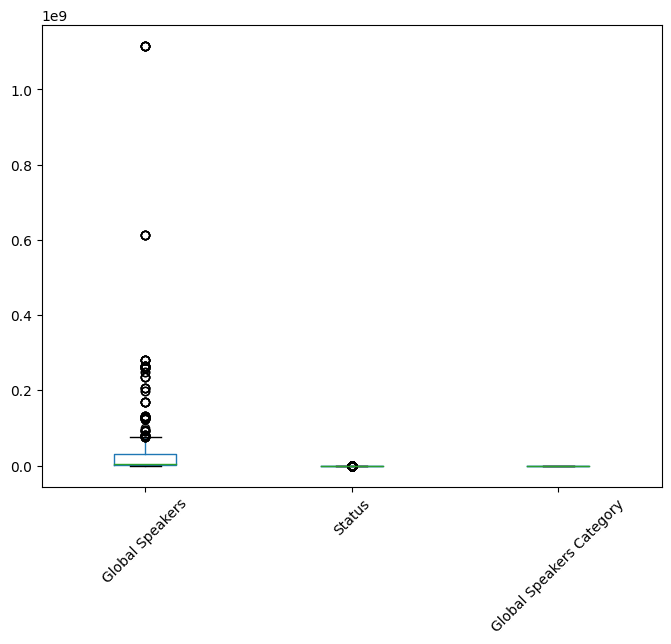

In [527]:
boxplot = df.drop('Size', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

### **Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1, yaitu kuartil pertama) dan capping (mengisi dengan nilai q3, yaitu kuartil ketiga) pada kolom "Size" bertujuan untuk mengatasi potensi outlier dan menerapkan batas bawah dan batas atas yang lebih realistis dalam analisis data.

In [528]:
Q1 = df['Global Speakers'].quantile(0.25)
Q3 = df['Global Speakers'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Global Speakers']=np.where(df['Global Speakers']>upper_whisker,upper_whisker,np.where(df['Global Speakers']<lower_whisker,lower_whisker,df['Global Speakers']))

### **Pengecekkan Kembali**

In [529]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Global Speakers,0.000000
Size,0.000000
Status,21.889764
Global Speakers Category,0.000000


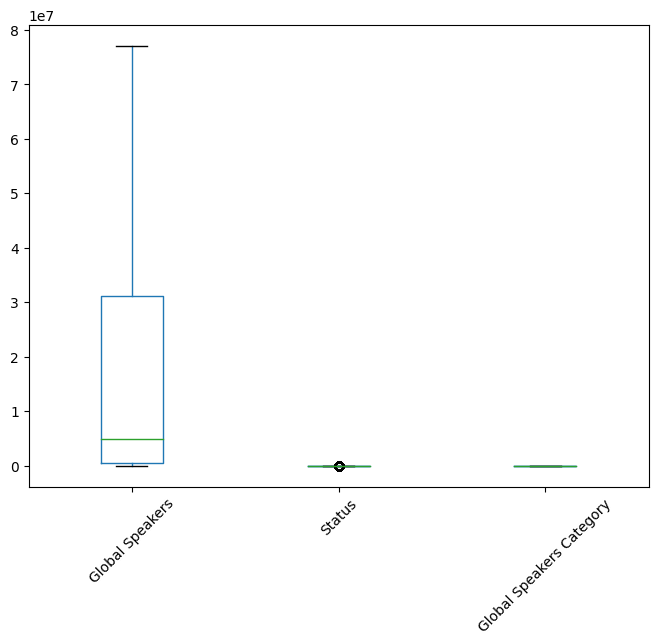

In [530]:
boxplot = df.drop('Size', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

# **Construct Data**

## **Melakukan Rekayasa Fitur (Feature Engineering)**

Saya menggunakan nilai mean pada global sepakers untuk menentukan kategori low atau height

In [504]:
def categorize_globalSpeakers(global_speakers):
    if global_speakers < 3.113691e+07:
        return 'low'
    else:
        return 'high'

df['Global Speakers Category'] = df['Global Speakers'].apply(categorize_globalSpeakers)

### **Pengecekkan Hasil**

In [505]:
df.head()

,Language,World Region,Country,Global Speakers,Location,Size,Status,Global Speakers Category
0,Abaza,Western Asia,"Turkey,\nRussia",4.980000e+04,Wayne (NJ),Smallest,Residential,low
1,Abruzzese,Southern Europe,Italy,3.113691e+07,Astoria,Small,Residential,high
2,Abruzzese,Southern Europe,Italy,3.113691e+07,Little Italy,Small,Historical,high
3,Acehnese,Southeastern Asia,Indonesia,3.500000e+06,Astoria,Smallest,Community,low
4,Acehnese,Southeastern Asia,Indonesia,3.500000e+06,Elmhurst,Smallest,Residential,low


# **Data Reduction**

## **Mengurangi Fitur - Fitur Yang Kurang Relevan**

Numeric kolom pada dataset ini, yang merupakan data berupa angka, merujuk secara khusus pada jumlah global speakers dalam konteks data linguistik yang disajikan.

In [506]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [507]:
df = df.drop(['Language','Location','World Region','Country'], axis=1)

### **Setelah fitur fitur dikurangi dan ditransformasi**

In [531]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

### **Pengecekkan Hasil**

In [535]:
df.head()

,Global Speakers,Size,Status,Global Speakers Category
0,4.980000e+04,0,0,0
1,3.113691e+07,1,0,1
2,3.113691e+07,1,1,1
3,3.500000e+06,0,2,0
4,3.500000e+06,0,0,0


# **Data Transformation**

## **Mapping**

mentransformasi kategori pada kolom dengan menggunakan integer dengan mengalokasikan bilangan bulat unik untuk setiap kategori yang berbeda

In [510]:

df['Global Speakers Category'] = df['Global Speakers Category'].map({'high':1,'low':0}).astype(int)
df['Size'] = df['Size'].map({'Smallest': 0, 'Small': 1,'Medium': 2, 'Large': 3, 'Largest': 4}).astype(int)
df['Status'] = df['Status'].map({'Residential': 0, 'Historical': 1,'Community': 2, 'Reviving': 3, 'Liturgical': 4}).astype(int)

In [532]:
df

,Global Speakers,Size,Status,Global Speakers Category
0,4.980000e+04,0,0,0
1,3.113691e+07,1,0,1
2,3.113691e+07,1,1,1
3,3.500000e+06,0,2,0
4,3.500000e+06,0,0,0
...,...,...,...,...
1265,1.344000e+06,0,2,0
1266,8.000000e+03,0,2,0
1267,1.200000e+07,0,2,0
1268,3.113691e+07,0,0,1


## **Encoding**

In [512]:
df = pd.get_dummies(df)

## **Pengecekkan Hasil**

In [533]:
df

,Global Speakers,Size,Status,Global Speakers Category
0,4.980000e+04,0,0,0
1,3.113691e+07,1,0,1
2,3.113691e+07,1,1,1
3,3.500000e+06,0,2,0
4,3.500000e+06,0,0,0
...,...,...,...,...
1265,1.344000e+06,0,2,0
1266,8.000000e+03,0,2,0
1267,1.200000e+07,0,2,0
1268,3.113691e+07,0,0,1


# **Kesimpulan**

Kesimpulan data preperation dibutuhkan untuk menghapus record record yang tidak diperlukan untuk implementasikan pada model. Dengan data preparation diharapkan akan meningkatkan kinerja dari sebuah model , sehingga akurasi prediksinya bisa maksimal .